In [3]:
import sys
sys.path.append('/kaggle')

from src.data.data_module import DataModule
from src.data.augmentations import Augmentations

from hydra import compose, initialize, initialize_config_dir
from omegaconf import OmegaConf

import numpy as np
import matplotlib.pyplot as plt

torch.Size([32, 1, 28, 28]) torch.Size([32])
tensor([5, 6, 2, 5, 0, 6, 9, 9, 6, 2, 8, 3, 8, 4, 1, 8, 6, 5, 3, 2, 5, 5, 0, 6,
        8, 4, 4, 8, 6, 7, 2, 6])


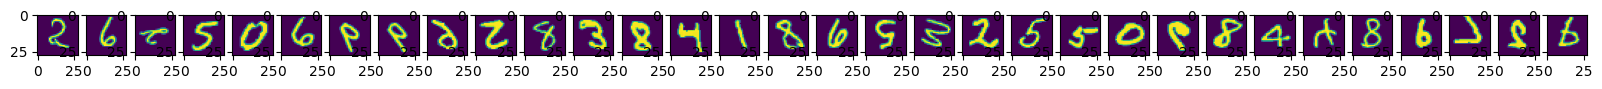

torch.Size([32, 1, 28, 28]) torch.Size([32])


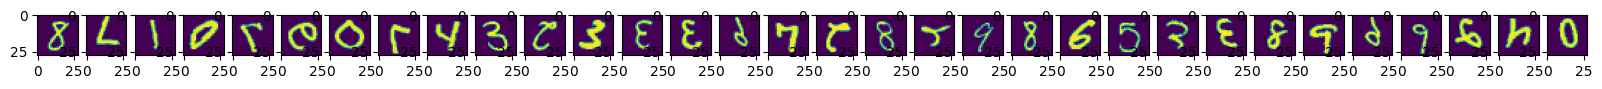

In [5]:
with initialize(config_path="../config", version_base="1.3"):
    train_config = compose(config_name="train")

config = train_config.dataset
train_transforms = Augmentations(config.train_transforms.config)
data_module = DataModule(
        data_dir=config.data_dir,
        train_num=config.train_num,
        valid_num=config.valid_num,
        test_num=config.test_num,
        num_workers=config.num_workers,
        batch_size=config.batch_size,
        pin_memory=config.pin_memory,
        train_transforms=train_transforms,
        valid_transforms=None,
        )
data_module.setup()
for input, target in data_module.train_dataloader():
    print(input.shape, target.shape)
    print(target)
    plt.figure(figsize=(20, 10))
    for batch in range(input.shape[0]):
        plt.subplot(1, input.shape[0], batch+1)
        plt.imshow(input[batch].permute(1, 2, 0))
    plt.show()
    break
    
for input, target in data_module.val_dataloader():
    print(input.shape, target.shape)
    print(target)
    plt.figure(figsize=(20, 10))
    for batch in range(input.shape[0]):
        plt.subplot(1, input.shape[0], batch+1)
        plt.imshow(input[batch].permute(1, 2, 0))
    plt.show()
    break